# Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load the data

In [2]:
data = pd.read_csv('dataset/data.csv')
data.head()

,Color,Diameter,Fruit
0,Green,3,Mango
1,Yellow,3,Mango
2,Red,1,Grape
3,Red,1,Grape
4,Yellow,3,Lemon


# Pandas Profiling

In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title='Data Report')

In [4]:
profile.to_file('Data_Report.html')

# EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Color     5 non-null      object
 1   Diameter  5 non-null      int64 
 2   Fruit     5 non-null      object
dtypes: int64(1), object(2)
memory usage: 248.0+ bytes


In [6]:
data.describe()

,Diameter
count,5.000000
mean,2.200000
std,1.095445
min,1.000000
25%,1.000000
50%,3.000000
75%,3.000000
max,3.000000


# Split data into feature and target variable

In [7]:
X = data.drop(['Fruit'], axis=1)
y = data['Fruit']

In [8]:
X, y

(    Color  Diameter
 0   Green         3
 1  Yellow         3
 2     Red         1
 3     Red         1
 4  Yellow         3,
 0    Mango
 1    Mango
 2    Grape
 3    Grape
 4    Lemon
 Name: Fruit, dtype: object)

### Convert the text color column into 3 numerical column

In [9]:
one_hot_data = pd.get_dummies(data[['Diameter','Color']])
one_hot_data, y

(   Diameter  Color_Green  Color_Red  Color_Yellow
 0         3            1          0             0
 1         3            0          0             1
 2         1            0          1             0
 3         1            0          1             0
 4         3            0          0             1,
 0    Mango
 1    Mango
 2    Grape
 3    Grape
 4    Lemon
 Name: Fruit, dtype: object)

# Train the model

In [10]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(one_hot_data, y)

DecisionTreeClassifier()

In [11]:
one_hot_data.columns.tolist()

['Diameter', 'Color_Green', 'Color_Red', 'Color_Yellow']

# Plot the model

[Text(223.2, 362.4, 'Diameter <= 2.0\ngini = 0.64\nsamples = 5\nvalue = [2, 1, 2]\nclass = Mango'),
 Text(111.6, 217.44, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = Mango'),
 Text(334.79999999999995, 217.44, 'Color_Green <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = Lemon'),
 Text(223.2, 72.47999999999996, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Grape'),
 Text(446.4, 72.47999999999996, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Lemon')]

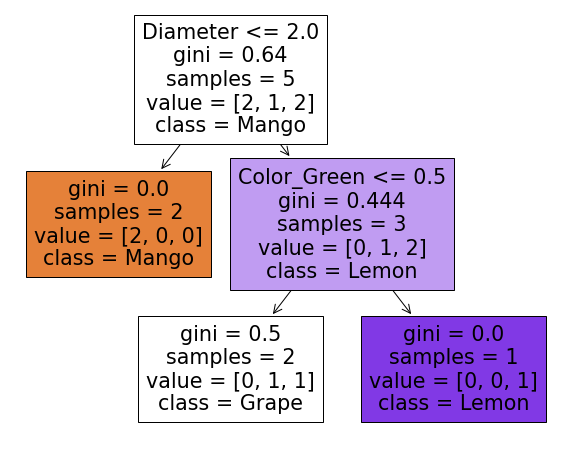

In [12]:
from sklearn.tree import plot_tree

fit = plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=one_hot_data.columns.tolist(), class_names=['Mango', 'Grape', 'Lemon'], filled=True)